# Q7) Priors, Sensitivity, Specificity

Premise:
- P(Infected=T) = 0.01  
- P(test=T | Infected=T) = 0.95 (sensitivity)  
- P(test=F | Infected=F) = 0.90 (specificity)  

In [251]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

We can go ahead and collect the probabilities for false positives and false negatives  

$$ P(+T|-I) = 1 - P(-T|-I) = 0.10 $$  
$$ P(-T|+I) = 1 - P(+T|+I) = 0.05 $$  

We'll now solve for the posterior  

$$ P(+I|+T) = \frac{P(+I) \cdot P(+T | +I)}{P(+T)} = \frac{P(+I) \cdot P(+T | +I)}{[P(+I) \cdot P(+T|+I)] + [P(-I) \cdot P(+T|-I)]} $$


In [252]:
def get_posterior(prior, sensitivity, specificity):
    return (prior * sensitivity) / (prior * sensitivity + (1-prior) * (1-specificity))


1) The posterior probability P(Infected=T | test=T) as a function of P(Infected=T)  
*Assumes fixed sensitivity and specificity*  

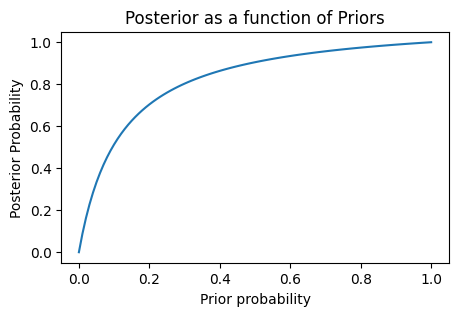

In [253]:
# Fixed data
sensitivity = 0.95
specificity = 0.90

# Calculate posteriors as a function of prior
priors = np.linspace(0, 1, 101)
posteriors = get_posterior(priors, sensitivity, specificity)

# Plot result
f, ax = plt.subplots(1,1,figsize=(5,3))
ax.set(xlabel="Prior probability", ylabel="Posterior Probability", title="Posterior as a function of Priors")
ax.plot(priors, posteriors)

2) The posterior probability P(Infected=T | test=T) as a function of P(Test=T | Infected=T) (sensitivity)  
*Assumes fixed prior and specificity*

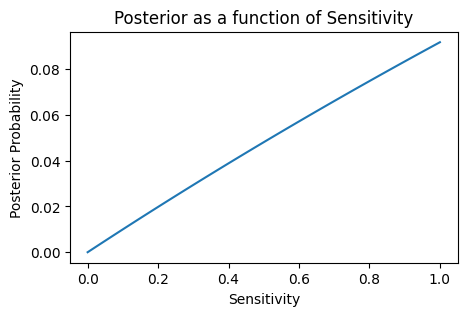

In [254]:
prior = 0.01
specificity = 0.90

# Calculate posteriors as a function of prior
sensitivities = np.linspace(0, 1, 101)
posteriors = get_posterior(prior, sensitivities, specificity)

# Plot result
f, ax = plt.subplots(1,1,figsize=(5,3))
ax.set(xlabel="Sensitivity", ylabel="Posterior Probability", title="Posterior as a function of Sensitivity")
ax.plot(sensitivities, posteriors)

3) The posterior probability P(Infected=T | test=T) as a function of P(Test=F | Infected=F) (specificity)  
*Assumes fixed prior and sensitivity*

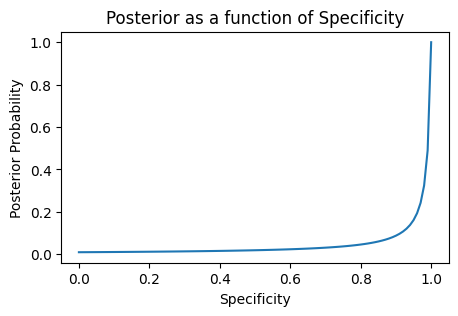

In [255]:
prior = 0.01
sensitivity = 0.95

# Calculate posteriors as a function of prior
specificities = np.linspace(0, 1, 101)
posteriors = get_posterior(prior, sensitivity, specificities)

# Plot result
f, ax = plt.subplots(1,1,figsize=(5,3))
ax.set(xlabel="Specificity", ylabel="Posterior Probability", title="Posterior as a function of Specificity")
ax.plot(specificities, posteriors)

4) Briefly discuss the posterior changes as a function of the quantities  

The Sensitivity function appeared to be the most linear out of the three, however it had the least amount of influence on the posterior probability. For that chart, the posterior stayed within [0, 0.1], whereas the others scaled up to 1.0. The Specificity function has little influence up until it reaches around 0.8. Then the posterior probability rises seemingly exponentially. The prior probability function appeared to have the most influence on posterior probability, taking on a logarithmic shape.


Bonus problem

C:\Users\grajec\AppData\Local\Temp\ipykernel_20572\1405158902.py:2: RuntimeWarning: invalid value encountered in divide
  return (prior * sensitivity) / (prior * sensitivity + (1-prior) * (1-specificity))


[Text(0.5, 0, 'Sensitivity'),
 Text(0.5, 0, 'Specificity'),
 Text(0.5, 0, 'Posterior Probability'),
 Text(0.5, 0.92, 'Posterior mapped to Sensitivity and Specificity')]

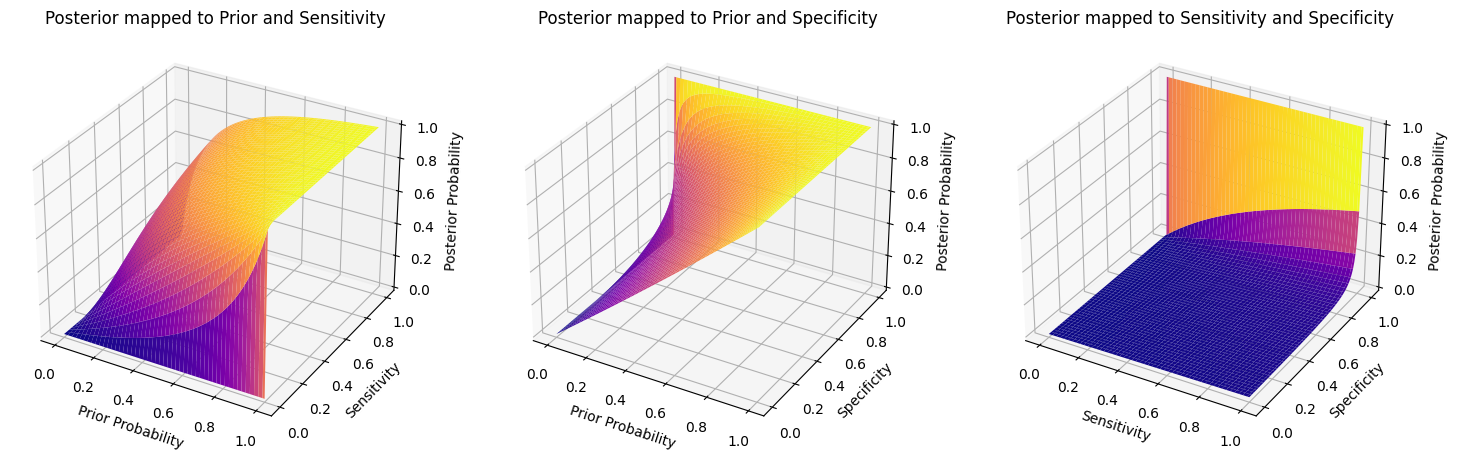

In [256]:
specificity = 0.90
sensitivity = 0.95
prior = 0.01

# Using mesh grid, apply posterior calculation to each relationship space
X, Y = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
prior_sens = np.nan_to_num(get_posterior(X, Y, specificity))
prior_spec = np.nan_to_num(get_posterior(X, sensitivity, Y))
sens_spec = np.nan_to_num(get_posterior(prior, X, Y))

# Plot result
f = plt.figure(figsize=(18,18))
ax1 = f.add_subplot(1,3,1,projection='3d')
ax1.plot_surface(X, Y, prior_sens, cmap="plasma")
ax1.set(xlabel="Prior Probability", ylabel="Sensitivity", zlabel="Posterior Probability", title="Posterior mapped to Prior and Sensitivity")

ax2 = f.add_subplot(1,3,2,projection='3d')
ax2.plot_surface(X, Y, prior_spec, cmap="plasma")
ax2.set(xlabel="Prior Probability", ylabel="Specificity", zlabel="Posterior Probability", title="Posterior mapped to Prior and Specificity")

ax3 = f.add_subplot(1,3,3,projection='3d')
ax3.plot_surface(X, Y, sens_spec, cmap="plasma")
ax3.set(xlabel="Sensitivity", ylabel="Specificity", zlabel="Posterior Probability", title="Posterior mapped to Sensitivity and Specificity")